### Optimization

It is a common problem in mathematics and chemistry to find the lowest value of a function, the **global minimum**. For example, the lowest configuration of a molecule is the one in which the energy of the molecule is minimized. Python can be used to find the minimum of a function. 

In this tutorial the utility of the minimize function from the scipy.optimize library will be illustrated for some simple mathematical functions. Some issues with the minimize function will also be highlighted to show limitations to its functionality. Its applicability to chemistry related problems will be explored in the next tutorial. 

The first step is importing the minimize function. 

In [37]:
from scipy.optimize import minimize

The function $f(x) = x^2$ takes the form

<img src="../images/x_squared.png" alt="drawing" width="400"/>

This clearly has a minimum at $x=0$. To find the minimum using the minimize functiom $f(x) = x^2$ must first be defined in python.

In [2]:
def square(x):
    """
    Description: a function that squares a number
    
    Args:
    x (int/float): the number to be squared
    
    Returns:
    x_squared (int/float): x squared
    """
    x_squared = x**2
    return(x_squared)

Using the `square` function and an initial guess, the minimize function can be utilized. The requirements of the minimize function can be read in the documentation (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) or alternatively one could type `minimize?`. This will allow the user to view the function description. Let's arbitrarily choose an initial guess of $x = 4$, and use the minimize function.

In [3]:
minimum_squared = minimize(square, 4)

The output of the minimize function is stored in the minimum_squared variable. The information that is returned is

In [4]:
minimum_squared

      fun: 6.668345606604765e-17
 hess_inv: array([[0.5]])
      jac: array([-1.43082657e-09])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([-8.16599388e-09])

This is a lot of information, but the three pieces of information that are of key importance are `fun`, `message`, and `x`. These represent:
- `fun`: the value of the function at the solution given.
- `message`: this will tell you whether the minimize function has converged on a solution
- `x`: this is the solution the minimize function has found

The solution that has been found is of the order $1 \times 10^{-9}$, which is zero to the tolerence of the minimization function. So the minimize function has found the minimum correctly! In order to obtain the solution one can type:

In [5]:
minimum_squared.x[0] #the [0] is required as our solution is stored in an array. We will see why later.

-8.165993881092959e-09

But what has the minimize function done to get from $x=4$ to the solution at $x=0$? Imagine placing a ball at $x=4$ on our graph then it will "roll down the hill" until it gets to the bottom as follows

<img src="../images/x_squared_ball.png" alt="drawing" width="800"/>

This is in effect how the minimize function finds the minimum of a function. It follows the negative gradient "down the hill" until it reaches the bottom. 

$f(x)=x^2$ only has one minimum, what happens for functions with more than one minimum? Say the function $f(x)=(x+1)^2(x-1)^2$, which takes the form

<img src="../images/polynomial_1.png" alt="drawing" width="400"/>

This has two minima. One at +1 and one at -1. Where does the ball go now? Well it depends where the calculation starts or, in other words, what the initial guess is:

<img src="../images/polynomial_1_ball.png" alt="drawing" width="800"/>

If the initial guess is less than 0 then the minimize function will obtain the minimum at $x=-1$ and if the initial guess is greater than 0 then the minimize function will obtain the minimum at $x=1$. We shall now test this prediction by writing a function for $f(x)=(x+1)^2(x-1)^2$ and using the minimize function:

In [6]:
def example_polynomial(x):
    """
    Description: a function that evaluates (x+1)(x+1)(x-1)(x-1)
    
    Args:
    x (int/float): the number to be evaluated
    
    Returns:
    evaluated_value (int/float): (x+1)(x+1)(x-1)(x-1)
    """
    evaluated_value = (x+1)*(x+1)*(x-1)*(x-1)
    return(evaluated_value)

greater_than_minimum = minimize(example_polynomial, +2)
less_than_minimum = minimize(example_polynomial, -2)

print("If we start at x=2, the minimum we find is x=", greater_than_minimum.x[0], "and f(x) =",greater_than_minimum.fun)
print("If we start at x=-2, the minimum we find is x=", less_than_minimum.x[0], "and f(x) =",less_than_minimum.fun)

If we start at x=2, the minimum we find is x= 0.9999989561808204 and f(x) = 4.358229369988024e-12
If we start at x=-2, the minimum we find is x= -0.9999989710772856 and f(x) = 4.23472345132519e-12


These are the solutions that one would expect from the rolling ball example. Here both minimum have a value of zero. What happens for function which have two minima that have different values though? This is the case for $f(x)=(2x+1)(x+1)(x-1)(x-2)$, which takes the form

<img src="../images/polynomial_2.png" alt="drawing" width="400"/>

Where will the ball roll to now? 

<img src="../images/polynomial_2_ball.png" alt="drawing" width="800"/>

We will see if these predictions are correct by writing this polynomial as a function and initialising our minimization at $x=-3$ and $x=+3$.

In [7]:
def second_example_polynomial(x):
    """
    Description: a function that evaluates (2x+1)(x+1)(x-1)(x-2)
    
    Args:
    x (int/float): the number to be evaluated
    
    Returns:
    evaluated_value (int/float): (2x+1)(x+1)(x-1)(x-2)
    """
    evaluated_value = (2*x+1)*(x+1)*(x-1)*(x-2)
    return(evaluated_value)

second_greater_than_minimum = minimize(second_example_polynomial, +3)
second_less_than_minimum = minimize(second_example_polynomial, -3)

print("If we start at x=3, the minimum we find is x=", second_greater_than_minimum.x[0], "and f(x) =",second_greater_than_minimum.fun)
print("If we start at x=-3, the minimum we find is x=", second_less_than_minimum.x[0], "and f(x) =",second_less_than_minimum.fun)

If we start at x=3, the minimum we find is x= 1.6029119759082024 and f(x) = -2.620904951418587
If we start at x=-3, the minimum we find is x= -0.7784457524125226 and f(x) = -0.6096677436637878


These are the two minimum that are expected from $f(x)=(2x+1)(x+1)(x-1)(x-2)$. However, note than the value of $f(x)=(2x+1)(x+1)(x-1)(x-2)$ is lower at $x=1.602$. This is a very important observation. It is often preferable to find the **global minimum** which is the lowest value of $f(x)$. But, as can be seen by previous examples, the minimize algorithm can get stuck in **local minima**. This is the case for at $x=-0.778$ above, if the ball "starts rolling" in the wrong place. 

### Finding the minima of radial wavefunctions

A similar process, as described above, can be applied to obtain the minima of more complex functions such as the radial wavefunction of hydrogen. The radial wavefunctions of hydrogen are

$R(r,n,l) = \sqrt{\left(\frac{2}{n}\right)^{3}\frac{(n-l-1)!}{2n(n+l)!}}\exp(\frac{r}{n})\left(\frac{2r}{n}\right)^{l} L^{2l+1}_{n-l-1}\left(\frac{2r}{n}\right)$

where $L^{2l+1}_{n-l-1}\left(\frac{2r}{n}\right)$ are the Laguerre polynomials evaluated at $\left(\frac{2r}{n}\right)$. 

The radial wavefunctions of hydrogen can be written in a python function as

In [33]:
def R(r,n,l):
    """
    Description: The hydrogen radial distribution function for a 
    given n, l, and r. 
    
    Args:
    r (floar/array): radius/radii to be evaluated
    n (int): principle quantum number
    l (int): angular quantum number
    
    Returns:
    radial_wavefunction (float/array): the radial distribution function
    
    """
    term_1 = np.power(np.power((2/n),3)*(math.factorial(n-l-1)/(2*n*math.factorial((n+l)))),0.5)
    term_2 = np.exp(-r/n)
    term_3 = np.power((2*r/n),l)
    term_4 = genlaguerre(n-l-1,2*l+1)(2*r/(n))
    radial_wavefunction = term_1*term_2*term_3*term_4
    return(radial_wavefunction)

The 3s radial wavefunction take the form:

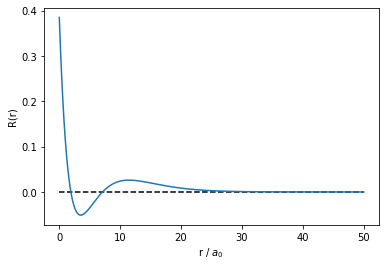

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import genlaguerre

r = np.linspace(0,50,1000)
plt.plot(r,R(r,3,0), label='3s')
plt.hlines(0,0,50, linestyles='dashed')
plt.xlabel(r'r / $a_{0}$')
plt.ylabel('R(r)')
plt.show()

The 3s radial wavefunction clearly has a unique minimum. Can the minimize function find this minimum if we start in the tail of the radial distribution function?

In [38]:
minimize(R, 20, args=(3,0)) #args are the other fixed variables of R

      fun: 2.2255577337508644e-05
 hess_inv: array([[201934.6605015]])
      jac: array([-6.26981864e-06])
  message: 'Optimization terminated successfully.'
     nfev: 42
      nit: 8
     njev: 14
   status: 0
  success: True
        x: array([43.4223927])

This indicates that the 'Optimization terminated successfully' at ~43. This is clearly not a minimum in the radial distribution function of 3s. What is happening?

The minimize function follows the path of negative gradient down the tail of the radial distribution function iteratively and terminated when the change in value is within a tolerance value. This tolerance was reached at ~43 in the calculation above. This illustrates that the minimize function can find minima, but can also be trapped by asymptotic behaviour. 

**Exercise:** Use R(r,n,l) and the minimize function to find the minima of the radial distribution functions of the 5p orbital.

In [44]:
### Write your code here

### Multi-dimensional minimization

Up until now only functions of one variable, $f(x)$, have been considered. What about functions of two or more variables? Can the minimize function find the minima of those functions. Consider the simplest of these functions $g(x,y) = x^2 + y^2$ which takes the form

<img src="../images/bowl.png" alt="drawing" width="400"/>

It may be difficult to see but $g(x,y) = x^2 + y^2$ is in essence a bowl. Where the bottom of the bowl is at $x=0, y=0$. But can the minimize function find this minimum? Yes, it can! Information just needs to be given to the minimize function in the correct format. 

**The minimize function can only optimize one variable**. How can two variables, $(x,y)$, be placed into one variable? A list is a good solution to this problem. Something of the form variables = [x,y] could be used. To illustrate this we will write a function to evaluate $g(x,y)$ and optimize it starting at $x=2,y=-2$ and see what result is obtained using the minimize function. 

In [8]:
def two_dimensional_polynomial(variables):
    """
    Description: a function that evaluates x**2 + y**2
    
    Args:
    variables (list): a kist containing x as the first item and y as the second item
    
    Returns:
    evaluated_value (float/int): x**2 + y**2
    """
    evaluated_value = variables[0]**2 + variables[1]**2
    return(evaluated_value)

two_dimensional_minimum = minimize(two_dimensional_polynomial, [2,-2])
two_dimensional_minimum

      fun: 1.3999347093356855e-14
 hess_inv: array([[0.75000002, 0.25      ],
       [0.25      , 0.74999998]])
      jac: array([-1.63721946e-07, -1.40312156e-07])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([-8.93115537e-08, -7.76066587e-08])

The minimize function has found the minimum successfully. The obtained x and y values are zero to within the tolerance of the minimize function. The solution is similarly stored in two_dimensional_minimum.x . **The order in which the solutions are stored is the same as the input into the function being minimized.** So two_dimensional_minimum.x[0] corresponds to the x value at the minimum and two_dimensional_minimum.x[1] corresponds to the y value at the minimum as this is the input order specified in two_dimensional_polynomial. 

**Exercise:** Write the function for the polynomial $h(x,y) = (x+1)^2(x-1)^2 + (y+1)^2(y-1)^2$, and use the minimize function to identify its four minima. Does $h(x,y)$ have a unique global minimum?

Hint: $h(x,y)$ takes the form

<img src="../images/polynomial_3.png" alt="drawing" width="400"/>

and has the corresponding contour plot

<img src="../images/polynomial_3_contour.png" alt="drawing" width="400"/>

In [9]:
### Write your code here

The minimize function can be used in any number of dimensions, it is not limited to one and two. Infact, that is why the solutions are always stored in arrays. The minimize function is designed to work in multiple dimensions.

**Key take aways:**
- it is possible to check if a minimize function has converged by checking the output information.
- the minimize function solutions depend on your initial guess.
- the minimize function can get trapped by asymptotic behaviour
- the minimize function can only optimize one variable, but can optimize more parameters by storing them in a list.

In the next tutorial, you will use what has been introduced here to assign proportions of chemicals from an experiment IR spectra that contains two chemicals. 